# The Neural Dynanmics of Valence and Intensity Encoding in the Amygdala and Prefrontal Cortex

**Authors:** Rahim Hashim, Roberto Gulli, Stefano Fusi, Daniel Salzman <br>
**Notebook Owner:** Rahim Hashim (rh2898@columbia.edu) <br>
***

# Import Libraries / Setting Task Parameters

In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
# Custom modules
import h5_helper
import preprocess_helper
from Path import Path
from Session import Session
pd.options.mode.chained_assignment = None  # default='warn'

ROOT = '/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/'
# ROOT = '/mnt/g/My Drive/Columbia/Salzman/Monkey-Training/'
EXPERIMENT = 'rhAirpuff'
TASK = 'Probabalistic_Airpuff_4x2'

path_obj = Path(ROOT, EXPERIMENT, TASK)

***
# Selecting Dates

In [2]:
# Specifying date/monkey/task
start_date = '2022-09-02' #@param {type:"date"}
end_date = '2022-09-02' #@param {type:"date"}
monkey_input = 'Aragorn' #@param ['Aragorn', 'Gandalf', 'Rob', 'Test']
reprocess_data = False #@param {type:"boolean"}
save_df =  False #@param {type:"boolean"}

# parse data
h5_filenames = h5_helper.h5_pull(path_obj.current_dir) # pull all .h5 files from specified directory
ml_config, trial_record, session_df, error_dict, behavioral_code_dict\
	= preprocess_helper.preprocess_data(h5_filenames,
																			path_obj,
																			start_date,
																			end_date,
																			monkey_input,
																			reprocess_data,
																			save_df)

# dates_selected = ['220913', '220928', '220929', '221006', '221019', '221026']
# session_df = session_df.loc[(session_df['date'].isin(dates_selected))]

Pulling '.h5' files...
Complete: 55 '.h5' files pulled

Files uploaded from processed folder

Pickled Files:
['220902_Aragorn_r1r2_behave.pkl']


***
# Adding Fields / Creating Session Object

In [3]:
import add_fields
import importlib
importlib.reload(add_fields)

# session_obj contains session metadata
session_obj = Session(session_df, monkey_input, TASK, behavioral_code_dict)

# adds custom fields
session_df, session_obj = add_fields.add_fields(session_df,
																								session_obj, 
																								behavioral_code_dict)
from image_diff import image_diff
FIGURE_SAVE_PATH = image_diff(session_df,
															session_obj,
															path_obj,
															combine_dates=True)
session_df_correct = session_df[session_df['correct'] == 1]

 Creating Session Objects...
  Max Values (X,Y): (-27.324,-25.232)
  Max Values (X,Y): (96.124,132.11)
 Adding additional fields to session_df DataFrame...
  20 new fields added.
  Index(['date', 'session_num', 'subject', 'trial_num', 'block', 'condition',
         'correct', 'error', 'error_type', 'behavioral_code_markers',
         'behavioral_code_times', 'stimuli_name', 'x_pos', 'y_pos', 'reward',
         'reward_prob', 'reward_mag', 'reward_drops', 'reward_length', 'airpuff',
         'airpuff_prob', 'airpuff_mag', 'airpuff_pulses', 'airpuff_side_L',
         'airpuff_side_R', 'eye_x', 'eye_y', 'eye_pupil', 'lick', 'photodiode',
         'trial_start', 'trial_datetime_start', 'trial_datetime_end',
         'Start Trial', 'Fixation On', 'Fixation Success', 'CS On', 'CS Off',
         'Trace Start', 'Trace End', 'Outcome Start', 'Reward Trigger',
         'Airpuff Trigger', 'Outcome', 'Outcome End', 'Manual Reward',
         'End Trial', 'valence', 'lick_raster', 'blink_raster', 't

***
## Generate Videos
Generate videos for all trials

In [ ]:
from generate_videos import generate_videos
session_df = generate_videos(session_df,
														 path_obj, 
														 session_obj,
														 delay_only=True)

***
## Run All Analysis Functions

  lick_vs_blink.png saved.
  perf_by_fractal.png saved.
  session_latency.png saved.
  outcome_params.png saved.
  session_lick_avg.png saved.
  session_blink_avg.png saved.
  fractal_lick_raster.png saved.
  fractal_blink_raster.png saved.
  raster_by_cond_1.png saved.
  raster_by_cond_2.png saved.
 [0.0, 0.5, 1.0] ANOVA 35.377 | P-value: 2.15E-14
  (0, 1) T-value: -6.264 P-value: 2.93E-09 |  Z-value: -5.908 P-value: 3.46E-09
    0 Lick Mean: 2.36 Lick Std: 1.474 Trials: 133
    1 Lick Mean: 3.564 Lick Std: 1.205 Trials: 72
  (0, 2) T-value: -7.883 P-value: 2.99E-13 |  Z-value: -7.302 P-value: 2.84E-13
    0 Lick Mean: 2.36 Lick Std: 1.474 Trials: 133
    2 Lick Mean: 3.824 Lick Std: 1.131 Trials: 72
  (1, 2) T-value: -1.325 P-value: 1.87E-01 |  Z-value: -1.325 P-value: 1.85E-01
    1 Lick Mean: 3.564 Lick Std: 1.205 Trials: 72
    2 Lick Mean: 3.824 Lick Std: 1.131 Trials: 72
  grant_reward.png saved.
 [0.0, 0.5, 1.0] ANOVA 10.168 | P-value: 5.50E-05
  (0, 1) T-value: -3.894 P-value:

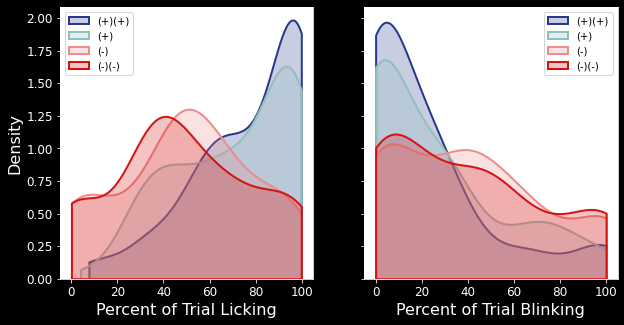

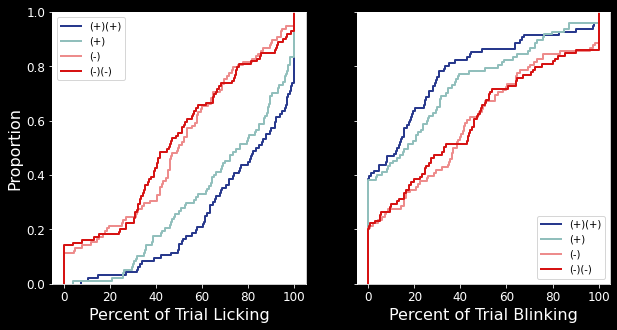

In [4]:
from run_functions import run_functions
session_obj = run_functions(session_df_correct, session_obj, path_obj, 
														behavioral_code_dict, error_dict, FIGURE_SAVE_PATH)

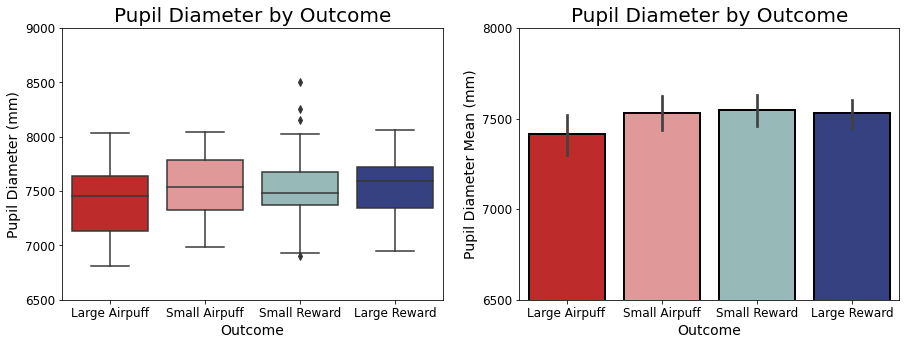

valence
-1.0    31
-0.5    31
 0.5    47
 1.0    51
Name: pupil_mean, dtype: int64
         pupil_preblink
valence                
-1.0                 24
-0.5                 16
 0.5                 17
 1.0                 19


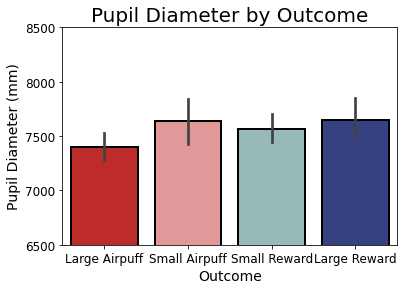

In [4]:
from pupil_analysis import pupil_valence_no_blink, pupil_preblink
pupil_valence_no_blink(session_df_correct, session_obj)
pupil_preblink(session_df_correct, session_obj)

In [5]:
def anticipatory_behavior(session_df_correct, session_obj, behavioral_code_dict, error_dict):
	keys = ['blink_duration_offscreen',
					'blink_duration_sig',
					'lick_duration',
					'pupil_window', ]
	valences = sorted(session_df_correct['valence'].unique(), reverse=True)
	for key in keys:
		print(key)
		for valence in valences:
			measure_list = []
			df_valence = session_df_correct[session_df_correct['valence'] == valence]
			for index, trial in df_valence.iterrows():
				measure_list.append(np.sum(trial[key]))
			print('  valence:', valence)
			print('    mean:', round(np.nanmean(measure_list), 3))
			print('    std:', round(np.std(measure_list), 3))

anticipatory_behavior(session_df_correct, session_obj, behavioral_code_dict, error_dict)

blink_duration_offscreen
  valence: 1.0
    mean: 0.159
    std: 0.265
  valence: 0.5
    mean: 0.191
    std: 0.281
  valence: -0.5
    mean: 0.31
    std: 0.366
  valence: -1.0
    mean: 0.316
    std: 0.364
blink_duration_sig
  valence: 1.0
    mean: 0.011
    std: 0.037
  valence: 0.5
    mean: 0.023
    std: 0.103
  valence: -0.5
    mean: 0.029
    std: 0.111
  valence: -1.0
    mean: 0.026
    std: 0.077
lick_duration
  valence: 1.0
    mean: 3.308
    std: 1.434
  valence: 0.5
    mean: 3.194
    std: 1.453
  valence: -0.5
    mean: 2.611
    std: 1.593
  valence: -1.0
    mean: 2.645
    std: 1.604
pupil_window
  valence: 1.0
    mean: 9883326.73
    std: 531326.025
  valence: 0.5
    mean: 9812413.687
    std: 886525.985
  valence: -0.5
    mean: 9844968.96
    std: 901858.932
  valence: -1.0
    mean: 9759146.83
    std: 802563.152


220928


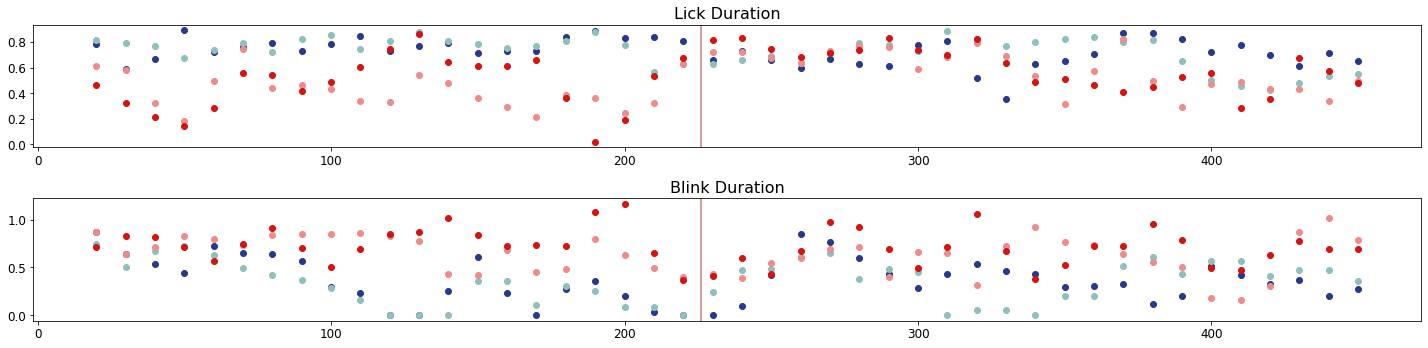

220929


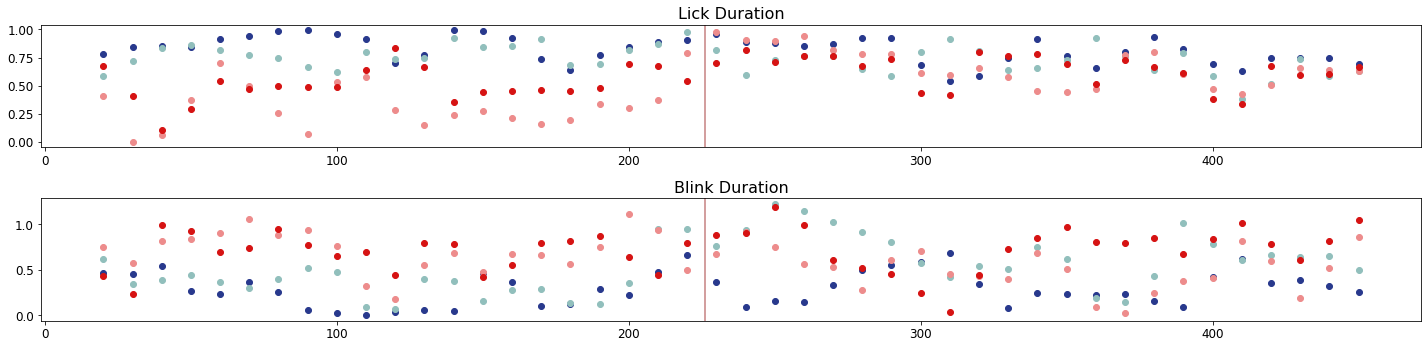

221006


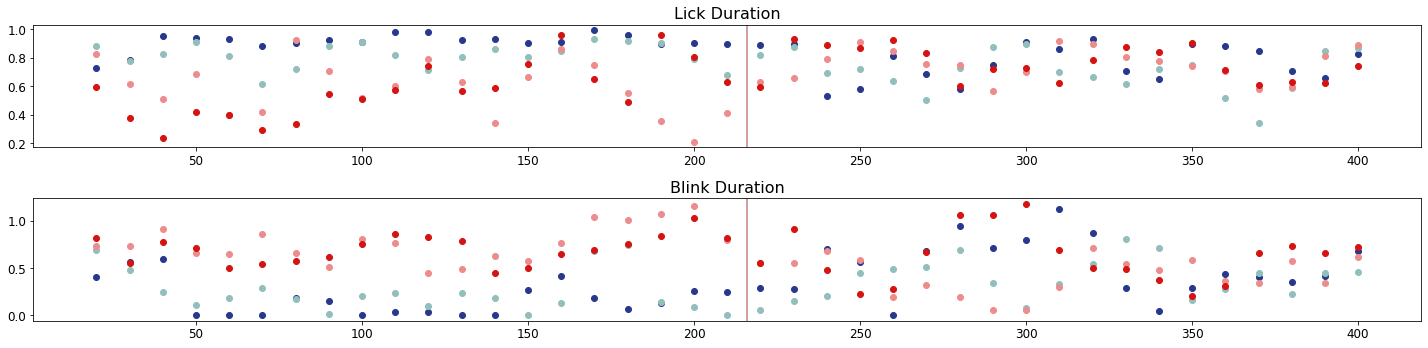

In [9]:
def measure_window(session_df, session_obj):

	correct_trial_count = len(session_df['correct'])
	range_count = np.arange(0, correct_trial_count+1, 10)
	valence_list = sorted(session_df['valence'].unique(), reverse=True)
	window_size = session_obj.window_lick
	f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 5))

	for r_index, upper_lim in enumerate(range_count[1:]):
		lower_lim = range_count[r_index-1]
		df_range = session_df.iloc[lower_lim:upper_lim]
		for v_index, valence in enumerate(valence_list):
			color = session_obj.valence_colors[v_index]
			df_valence = df_range[df_range['valence'] == valence]
			lick_count_valence = float(df_valence['lick_count_window'].apply(lambda x: np.nansum(x)).mean()/window_size)
			ax1.scatter(upper_lim, lick_count_valence, color=color)
			ax1.set_title('Lick Duration')
			blink_count_valence = float(df_valence['blink_count_window'].apply(lambda x: np.nansum(x)).mean()/window_size)
			ax2.scatter(upper_lim, blink_count_valence, color=color)
			ax2.set_title('Blink Duration')

	session_df['block_change'] = session_df['block'].diff()
	block_change_trials = np.nonzero(session_df['block_change'].tolist())[0]
	block_change = -1
	if len(block_change_trials) > 1:
		block_change = np.nonzero(session_df['block_change'].tolist())[0][1]
		ax1.axvline(x=block_change+1, c='darkred', alpha=0.5)
		ax2.axvline(x=block_change+1, c='darkred', alpha=0.5)
	f.tight_layout()
	plt.show()


for date in session_df_correct['date'].unique():
	session_df_date = session_df_correct[session_df_correct['date'] == date]
	print(date)
	measure_window(session_df_date, session_obj)

In [6]:
for valence in sorted(session_df_correct['valence'].unique(), reverse=True):
	df = session_df_correct[session_df_correct['valence'] == valence]
	print(valence, df['eye_distance'].mean())

1.0 21.203583805443596
0.5 23.84115246745986
-0.5 27.35915055625763
-1.0 28.337437198717815


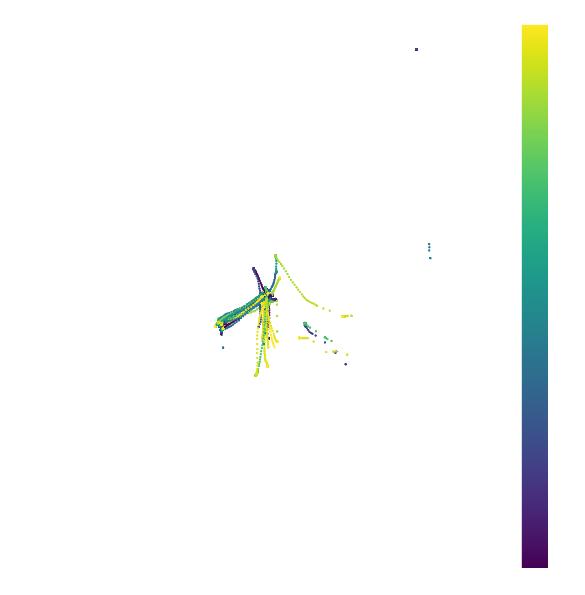

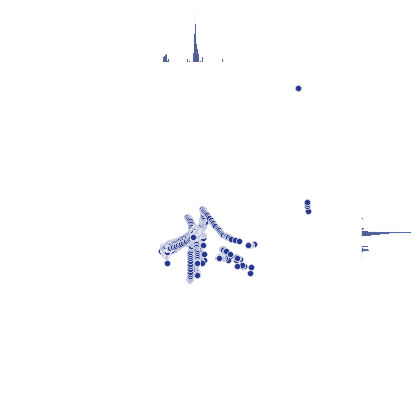

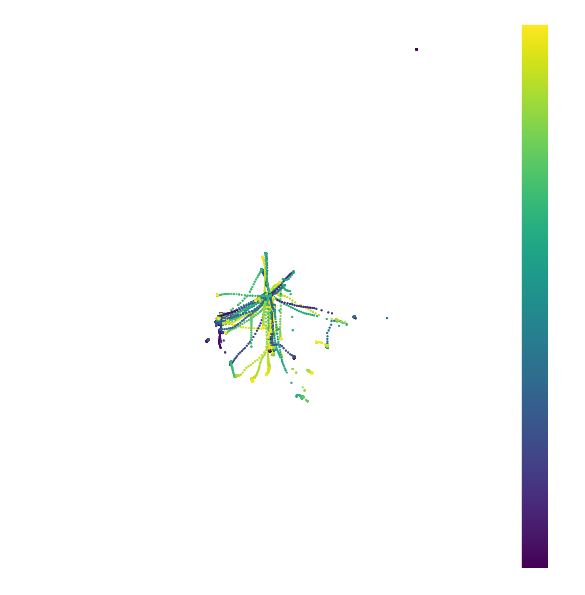

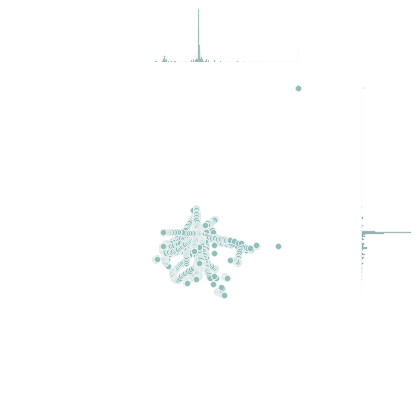

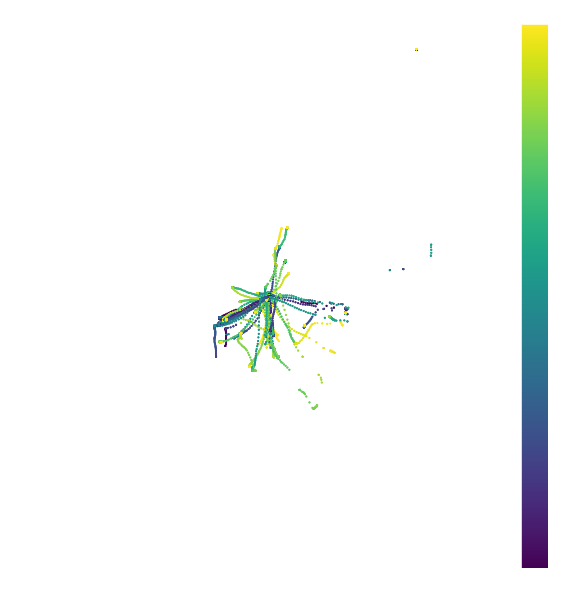

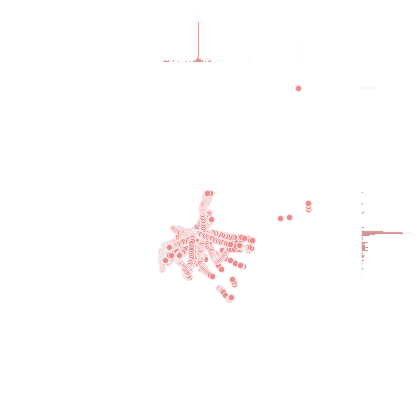

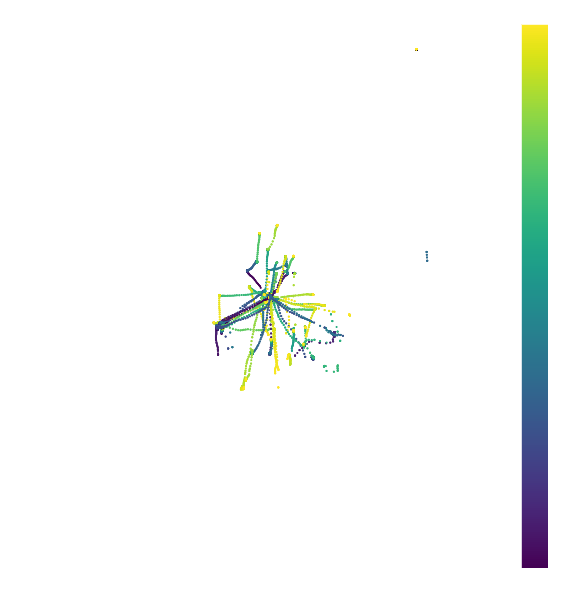

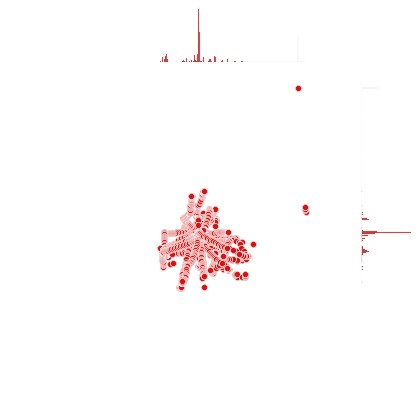

In [23]:
import matplotlib.pyplot as plt
from plot_helper import set_plot_params

def eye_data_delay(row, trace_window):
	delay_end = row['Trace End']
	eye_x = row['eye_x'][delay_end-trace_window:delay_end]
	eye_y = row['eye_y'][delay_end-trace_window:delay_end]
	row['eye_x_delay'] = eye_x
	row['eye_y_delay'] = eye_y
	return row

def eye_outside_threshold(row):
	blink_count_window = row['blink_count_window']
	eye_x = row['eye_x_delay']
	eye_y = row['eye_y_delay']
	try:
		# print(list(zip(eye_x, eye_y, blink_raster)))
		eye_x_threshold = [x for x_index, x in enumerate(eye_x)
												if blink_count_window[x_index] == 1]
		eye_y_threshold = [y for y_index, y in enumerate(eye_y)
												if blink_count_window[y_index] == 1]
	except:
		eye_x_threshold = []
		eye_y_threshold = []
	row['eye_x_threshold'] = eye_x_threshold
	row['eye_y_threshold'] = eye_y_threshold
	return row

def eye_signal_delay(row, session_obj):
	eye_blink_signal = session_obj.blink_signal
	BLINK_SIGNAL = [(eye_blink_signal['eye_x_min'], eye_blink_signal['eye_y_min']),
									(eye_blink_signal['eye_x_max'], eye_blink_signal['eye_y_max'])]
	eye_x = row['eye_x_delay']
	eye_y = row['eye_y_delay']
	blink_count = [1 if (x,y) in BLINK_SIGNAL else 0 
									for (x,y) in zip(eye_x, eye_y)]
	eye_x_threshold = [x for x_index, x in enumerate(eye_x)
											if blink_count[x_index] == 0]
	eye_y_threshold = [y for y_index, y in enumerate(eye_y)
											if blink_count[y_index] == 0]

	row['eye_x_sig'] = eye_x_threshold
	row['eye_y_sig'] = eye_y_threshold

	return row

def plot_eye_data(session_df, session_obj):
	import seaborn as sns

	# trial_numbers = input('Enter trial numbers to plot (e.g. 1,2,3...{}): '.format(len(session_df)))
	# row = session_df.iloc[int(trial_numbers)]
	# trial_numbers = list(row.index)
	COLORS = session_obj.valence_colors
	session_df = session_df.apply(eye_data_delay, 
					trace_window = session_obj.window_blink, axis=1)
	session_df = session_df.apply(eye_outside_threshold, axis=1)
	session_df = session_df.apply(eye_signal_delay, 
															  session_obj=session_obj,
																axis=1)
	for v_index, valence in enumerate(sorted(session_df['valence'].unique(), reverse=True)):
		set_plot_params(FONT=12,
										AXES_TITLE=16,
										AXES_LABEL=18, 
										TICK_LABEL=12, 
										LEGEND=10, 
										TITLE=20)
		f, ax = plt.subplots(1, 1, figsize=(10, 10))
		df = session_df[session_df['valence'] == valence]
		for index, row in df.iterrows():
			x = row['eye_x_delay']
			y = row['eye_y_delay']
			z = list(range(len(row['eye_x_delay'])))
			scatterplot = ax.scatter(x, y, c=z, cmap='viridis', s=1)
		
		eye_x = df['eye_x_delay'].tolist()
		eye_y = df['eye_y_delay'].tolist()
		x_flatten = [item for sublist in eye_x for item in sublist]
		y_flatten = [item for sublist in eye_y for item in sublist]
		# ax2.hist2d(x_flatten, y_flatten, bins=100, cmap='viridis', 
		# 							range=[[-100, 100], [-100, 100]], 
		# 							density=True)
		sns.jointplot(x=x_flatten, 
									y=y_flatten, 
									color=COLORS[v_index],
									xlim = (-100,100),
									ylim = (-100,100))

		ax.set_title('Valence: {}'.format(valence))
		ax.set_xlim([-100, 100])
		ax.set_ylim([-100, 100])
		f.colorbar(scatterplot, ax=ax)

TRIAL_THRESHOLD = 10
# only include trials after subject has seen fractal <TRIAL_THRESHOLD> number of times
session_df_count = session_df_correct[session_df_correct['fractal_count_in_block'] > TRIAL_THRESHOLD]
plot_eye_data(session_df_count, session_obj)

  lick_blink_hist.png saved.
  lick_blink_cdf.png saved.
Lick
  (+)(+) vs (+): ks_stat: 0.14, p_val: 2.31E-01
  (+)(+) vs (-): ks_stat: 0.44, p_val: 2.91E-09
  (+)(+) vs (-)(-): ks_stat: 0.45, p_val: 1.85E-09
  (+) vs (-): ks_stat: 0.32, p_val: 4.98E-05
  (+) vs (-)(-): ks_stat: 0.33, p_val: 3.44E-05
  (-) vs (-)(-): ks_stat: 0.14, p_val: 2.64E-01
Blink
  (+)(+) vs (+): ks_stat: 0.13, p_val: 3.21E-01
  (+)(+) vs (-): ks_stat: 0.37, p_val: 1.24E-06
  (+)(+) vs (-)(-): ks_stat: 0.32, p_val: 6.82E-05
  (+) vs (-): ks_stat: 0.28, p_val: 5.40E-04
  (+) vs (-)(-): ks_stat: 0.26, p_val: 2.11E-03
  (-) vs (-)(-): ks_stat: 0.09, p_val: 8.03E-01


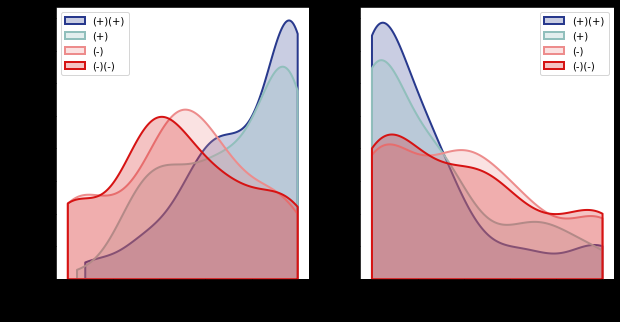

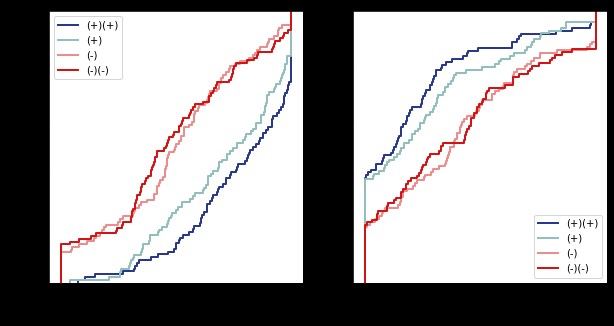

In [23]:
from measure_hist import measure_hist
measure_hist(session_df_correct, session_obj)

In [24]:
from grant_plots import grant_plots
grant_plots(session_df_correct, session_obj)

 [0.0, 0.5, 1.0] ANOVA 42.386 | P-value: 4.45E-17
  (0, 1) T-value: -6.582 P-value: 4.23E-10 |  Z-value: -6.237 P-value: 4.47E-10
    0 Lick Mean: 2.318 Lick Std: 1.5 Trials: 164
    1 Lick Mean: 3.516 Lick Std: 1.265 Trials: 84
  (0, 2) T-value: -8.924 P-value: 3.07E-16 |  Z-value: -8.106 P-value: 5.25E-16
    0 Lick Mean: 2.318 Lick Std: 1.5 Trials: 164
    2 Lick Mean: 3.869 Lick Std: 1.13 Trials: 79
  (1, 2) T-value: -1.87 P-value: 6.33E-02 |  Z-value: -1.864 P-value: 6.24E-02
    1 Lick Mean: 3.516 Lick Std: 1.265 Trials: 84
    2 Lick Mean: 3.869 Lick Std: 1.13 Trials: 79
  grant_reward.png saved.
 [0.0, 0.5, 1.0] ANOVA 11.049 | P-value: 2.28E-05
  (0, 1) T-value: -3.794 P-value: 2.21E-04 |  Z-value: -4.046 P-value: 5.22E-05
    0 Blink Mean: 0.234 Blink Std: 0.282 Trials: 163
    1 Blink Mean: 0.4 Blink Std: 0.341 Trials: 82
  (0, 2) T-value: -3.638 P-value: 3.91E-04 |  Z-value: -3.914 P-value: 9.09E-05
    0 Blink Mean: 0.234 Blink Std: 0.282 Trials: 163
    2 Blink Mean: 0.397

In [67]:
import os
import numpy as np
import pandas as pd
from scipy import signal
from decimal import Decimal
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations, permutations
from scipy.stats import ttest_ind, ttest_ind_from_stats
import warnings
warnings.filterwarnings("ignore")

# Custom Functions
from plot_helper import smooth_plot, round_up_to_odd, moving_avg, set_plot_params
from two_sample_test import two_sample_test

def epoch_time(df):
	# taking the minimum length of epochs to find cutoff values
	# for each epoch of task
	cs_duration_hist = np.array(df['CS Off'].tolist()) - np.array(df['CS On'].tolist())
	cs_end_min = min(cs_duration_hist)
	trace_duration_hist = np.array(df['Trace End'].tolist()) - np.array(df['Trace Start'].tolist())
	trace_end_min = min(trace_duration_hist) + cs_end_min
	outcome_duration_hist = np.array(df['trial_bins'].tolist()) - np.array(df['Trace End'].tolist())
	outcome_end_min = min(outcome_duration_hist) + cs_end_min - 1 # not sure why I included -1 but it was necessary, check this
	return cs_end_min, trace_end_min, outcome_end_min

def raster_by_condition(session_df, behavioral_code_dict, error_dict, session_obj):

	set_plot_params(FONT=20, AXES_TITLE=22, AXES_LABEL=20, TICK_LABEL=20, LEGEND=16, TITLE=28)

	PRE_CS = 50 # time before CS-on (for moving average calculation)
	FIGURE_SAVE_PATH = session_obj.figure_path
	COLORS = session_obj.valence_colors
	WINDOW_THRESHOLD_LICK = session_obj.window_lick
	WINDOW_THRESHOLD_BLINK = session_obj.window_blink

	lick_dict = defaultdict(list)
	blink_dict = defaultdict(list)
	pupil_dict = defaultdict(list)

	lick_epoch_dict = defaultdict(lambda:defaultdict(list))
	blink_epoch_dict = defaultdict(lambda:defaultdict(list))
	pupil_epoch_dict = defaultdict(lambda:defaultdict(list))

	lick_data_probability = defaultdict(list)
	blink_data_probability = defaultdict(list)

	lick_data_duration = defaultdict(list)
	blink_data_duration = defaultdict(list)
	pupil_data_binary = defaultdict(list)

	gs_kw = dict(width_ratios=[5, 1])
	f, axarr = plt.subplots(2,2, gridspec_kw=gs_kw, sharey = False, figsize=(50,20))

	LABELS = session_obj.stim_labels
	num_fractals = len(LABELS)

	TRIAL_THRESHOLD = 20

	# only include trials after subject has seen fractal <TRIAL_THRESHOLD> number of times
	session_df_count = session_df[session_df['fractal_count_in_block'] > TRIAL_THRESHOLD]
	# only include one switch (for now)
	session_df_threshold = session_df_count[session_df_count['block'] <= 2]

	# calculate minimum epoch times
	cs_time_min, trace_time_min, outcome_time_min = epoch_time(session_df_threshold)

	valence_list = sorted(session_df_threshold['valence'].unique(), reverse=True)
	for df_index, valence in enumerate(valence_list):

		df = session_df_threshold[session_df_threshold['valence'] == valence]

		# valence-specific session lick/blink data
		lick_data_raster = df['lick_raster'].tolist()
		blink_data_raster = df['blink_raster'].tolist()
		pupil_data = df['eye_pupil'].tolist()

		# single bin lick data (-<WINDOW_THRESHOLD>ms from trace interval end)

		for t_index, trial in enumerate(lick_data_raster):

			cs_on_time = df['CS On'].iloc[t_index]
			trace_on_time = df['Trace Start'].iloc[t_index]
			trace_off_time = df['Trace End'].iloc[t_index]

			# Lick/Blink Probability
			## counts if there was any lick in the specified time window
			lick_data_window = df['lick_count_window'].iloc[t_index]
			if 1 in lick_data_window:
				lick_data_probability[df_index].append(1)
			else:
				lick_data_probability[df_index].append(0)

			## counts if there was any blink in the specified time window
			blink_data_window = df['blink_count_window'].iloc[t_index]
			if 1 in blink_data_window:
				blink_data_probability[df_index].append(1)
				pupil_data_trial = range(10000) # for min trial pupil length
			else:
				blink_data_probability[df_index].append(0)
				# only add pupil data if there was no blink
				pupil_data_window = pupil_data[t_index][trace_off_time-WINDOW_THRESHOLD_LICK:trace_off_time]
				pupil_data_window_mean = np.mean(pupil_data_window)
				pupil_data_binary[df_index].append(pupil_data_window_mean)
				pupil_data_trial = pupil_data[t_index][cs_on_time-PRE_CS:]

			# Lick/Blink Duration
			lick_raw = df['lick'].iloc[t_index]
			lick_data_voltage = lick_raw[trace_off_time-WINDOW_THRESHOLD_LICK:trace_off_time]
			lick_data_voltage_mean = np.mean(lick_data_voltage)
			lick_data_duration[df_index].append(lick_data_voltage_mean)

			blink_raw = df['blink_duration_offscreen'].iloc[t_index]
			blink_data_duration[df_index].append(blink_raw)

			lick_data_trial = lick_data_raster[t_index][cs_on_time-PRE_CS:]
			blink_data_trial = blink_data_raster[t_index][cs_on_time-PRE_CS:]

			lick_data_cs = lick_data_raster[t_index][cs_on_time:trace_on_time]
			lick_data_trace = lick_data_raster[t_index][trace_on_time:trace_off_time]
			lick_data_outcome = lick_data_raster[t_index][trace_off_time:]

			blink_data_cs = blink_data_raster[t_index][cs_on_time:trace_on_time]
			blink_data_trace = blink_data_raster[t_index][trace_on_time:trace_off_time]
			blink_data_outcome = blink_data_raster[t_index][trace_off_time:]

			time = np.arange(len(lick_data_trial))

			# lick_data_trial and blink_data_trial are sometimes off by 1 frame
			# 	must investigate further
			shorter_trial_data = min(len(lick_data_trial), len(blink_data_trial), len(pupil_data_trial))
			for bin_num in range(shorter_trial_data):
				lick_dict[bin_num].append(lick_data_trial[bin_num])
				blink_dict[bin_num].append(blink_data_trial[bin_num])
				if 1 not in blink_data_window:
					pupil_dict[bin_num].append(pupil_data_trial[bin_num])

			for bin_num in range(cs_time_min):
				lick_epoch_dict['CS'][bin_num].append(lick_data_cs[bin_num])
				blink_epoch_dict['CS'][bin_num].append(blink_data_cs[bin_num])
			for bin_num in range(trace_time_min-cs_time_min):
				lick_epoch_dict['Trace'][bin_num].append(lick_data_trace[bin_num])
				blink_epoch_dict['Trace'][bin_num].append(blink_data_trace[bin_num])
			for bin_num in range(outcome_time_min-cs_time_min):
				lick_epoch_dict['Outcome'][bin_num].append(lick_data_outcome[bin_num])
				blink_epoch_dict['Outcome'][bin_num].append(blink_data_outcome[bin_num])

		# Now analyze all trials together

		bins = list(lick_dict.keys())
		lick_data_mean = list(map(np.mean, lick_dict.values()))
		blink_data_mean = list(map(np.mean, blink_dict.values()))
		pupil_data_mean = list(map(np.mean, pupil_dict.values()))

		labels = session_obj.valence_labels.values()
		label = session_obj.valence_labels[valence]

		# Simple Moving Average Smoothing
		WINDOW_SIZE = PRE_CS
		x = np.array(bins[PRE_CS:]) # only capturing post-CS bins
		y1 = moving_avg(lick_data_mean, WINDOW_SIZE)
		axarr[0][0].plot(x, y1[:-1], 
										color=COLORS[df_index], label=label, linewidth=4)
		y2 = moving_avg(blink_data_mean, WINDOW_SIZE)
		axarr[1][0].plot(x, y2[:-1], 
										color=COLORS[df_index], label=label, linewidth=4)

	axarr[0][0].text(0, 1.08, 'CS On', ha='center', va='center', fontsize=45, color='white')
	axarr[0][0].text(cs_time_min, 1.08, 'Delay', ha='center', va='center', fontsize=45, color='white')
	axarr[0][0].text(trace_time_min, 1.08, 'Outcome', ha='center', va='center', fontsize=45, color='white')
	axarr[0][0].set_ylabel('Probability of Lick', fontsize=60)
	axarr[0][0].set_ylim([0.4, 1.05])
	axarr[0][0].set_yticks(np.arange(0.4,1.05,0.1))
	axarr[0][0].tick_params(axis='both', which='major', labelsize=30)
	# lick

	# blink
	axarr[1][0].set_ylabel('Probability of Blink', fontsize=60)
	axarr[1][0].set_ylim([0, 0.6])
	axarr[1][0].set_yticks(np.arange(0,0.7,0.1), fontsize=30)
	axarr[1][0].tick_params(axis='both', which='major', labelsize=30)
	
	probability_list = [lick_data_probability, blink_data_probability, pupil_data_binary]
	duration_list = [lick_data_duration, blink_data_duration, pupil_data_binary]
	label_list_dur = ['Avg Lick Duration', 'Avg Blink Duration']

	for ax_index in range(2):
		# Time Epochs
		axarr[ax_index][0].axvline(0, color='black')
		axarr[ax_index][0].axvline(cs_time_min, color='black')
		axarr[ax_index][0].axvline(trace_time_min, color='black')
		if ax_index == 1:
			window_threshold_label = WINDOW_THRESHOLD_BLINK
		else:
			window_threshold_label = WINDOW_THRESHOLD_LICK
		axarr[ax_index][0].axvspan(xmin=trace_time_min-window_threshold_label,
								xmax=trace_time_min-1,
								ymin=0,
								ymax=1,
								alpha=0.2,
								color='grey')

		axarr[ax_index][0].legend()

		# Bar Graph - lick/blink duration
		data_duration_mean = list(map(np.mean, duration_list[ax_index].values()))
		if ax_index == 0:
			data_duration_mean = list(np.array(data_duration_mean)/5) # normalize lick data
		axarr[ax_index][1].bar(list(range(num_fractals)), data_duration_mean, color=COLORS, ec='black')
		axarr[ax_index][1].set_xticks(list(range(num_fractals)))
		axarr[ax_index][1].set_xticklabels(labels)
		axarr[ax_index][1].set_xlabel('Outcome', fontsize=40)
		axarr[ax_index][1].set_ylabel('{}'.format(label_list_dur[ax_index]), fontsize=40)
	
	axarr[0][1].set_title('Delay\n(last {}ms)'.format(WINDOW_THRESHOLD_LICK), fontsize=40)
	axarr[1][1].set_title('Delay\n(last {}ms)'.format(WINDOW_THRESHOLD_BLINK), fontsize=40)

	img_save_path = os.path.join(FIGURE_SAVE_PATH, 'raster_by_cond.svg')

	print('  raster_by_cond.svg saved.')
	f.tight_layout()
	plt.savefig(img_save_path, dpi=150, bbox_inches='tight', pad_inches = 0.1)
	plt.close('all')

In [68]:
lick_data_duration = raster_by_condition(session_df_correct, session_obj, error_dict, session_obj)

  raster_by_cond.svg saved.


In [ ]:
import os
import math
import numpy as np
import pandas as pd
from scipy import signal
from decimal import Decimal
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from collections import defaultdict
from itertools import combinations, permutations
from scipy.stats import ttest_ind, ttest_ind_from_stats, f_oneway
from statsmodels.stats.weightstats import ztest as ztest
import warnings
warnings.filterwarnings("ignore")

# Custom Functions
from plot_helper import smooth_plot, round_up_to_odd, moving_avg, set_plot_params
from two_sample_test import two_sample_test

def significance_test(measure_duration_list, outcome_mag_list, measure):
	"""
	significance_test performs a two sample t-test on the lick/blink data duration list

	Args:
		measure_duration_list (list): list of lick data duration

	Returns:
		t_stat (float): t-statistic
		p_value (float): p-value
	"""
	ANOVA_stat, ANOVA_pvalue = f_oneway(*measure_duration_list)
	ANOVA_p_value_string = '%.2E' % Decimal(ANOVA_pvalue)
	print(' {} ANOVA {} | P-value: {}'.format(outcome_mag_list, round(ANOVA_stat, 3), ANOVA_p_value_string))
	measure_mag_combinations = list(combinations(range(len(outcome_mag_list)), 2))
	measure_duration_combinations = list(combinations(measure_duration_list, 2))
	for m_index, magnitude in enumerate(measure_mag_combinations):
		mag_1 = measure_duration_combinations[m_index][0]
		mag_2 = measure_duration_combinations[m_index][1]
		t, p = ttest_ind(mag_1, 
										 mag_2,
										 equal_var=False)
		p_val_string = '%.2E' % Decimal(p)
		z_val, p_value = ztest(mag_1, mag_2, 
													 alternative='two-sided', 
													 usevar='pooled', 
													 ddof=1.0)
		z_val_string = '%.2E' % Decimal(p_value)
		print('  {}'.format(magnitude), 'T-value: {}'.format(round(t,3)), 'P-value: {} | '.format(p_val_string),
																		'Z-value: {}'.format(round(z_val,3)), 'P-value: {}'.format(z_val_string,3))
		print('    {}'.format(measure_mag_combinations[m_index][0]), 
												'{} Mean: {}'.format(measure, round(np.nanmean(mag_1), 3)),
												'{} Std: {}'.format(measure, round(np.std(mag_1), 3)), 
												'Trials: {}'.format(len(mag_1)))
		print('    {}'.format(measure_mag_combinations[m_index][1]), 
												'{} Mean: {}'.format(measure, round(np.nanmean(mag_2), 3)), 
												'{} Std: {}'.format(measure, round(np.std(mag_2), 3)), 
												'Trials: {}'.format(len(mag_2)))

def grant_plots(session_df, session_obj):

	gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1.5], height_ratios=[1, 1])
	fig_dimensions = [[gs[:, 1], gs[0, 0], gs[1, 0]],
										[gs[:, 0], gs[0, 1], gs[1, 1]]]
	plot_params = ['lick_duration', 'blink_duration_offscreen']
	mag_list = ['reward_mag', 'airpuff_mag']

	COLORS = [['#D2DCD3', '#91BFBC', '#28398D'],
						['#D2DCD3', '#ed8c8c', '#d61313']]

	outcomes = ['Reward', 'Airpuff']
	measures = ['Lick', 'Blink']

	for plot_index, plot_param in enumerate(plot_params):
		outcome = outcomes[plot_index]
		measure = measures[plot_index]
		set_plot_params(FONT=12,
										AXES_TITLE=16,
										AXES_LABEL=18, 
										TICK_LABEL=12, 
										LEGEND=10, 
										TITLE=20)
		fig = plt.figure(figsize=(10, 6))

		FIGURE_SAVE_PATH = session_obj.figure_path
		if 'lick' in plot_param:
			WINDOW_THRESHOLD = session_obj.window_lick
		else:
			WINDOW_THRESHOLD = session_obj.window_blink
		TRIAL_THRESHOLD = 10
		session_df_correct = session_df[session_df['correct'] == 1]
		# only include trials after subject has seen fractal <TRIAL_THRESHOLD> number of times
		session_df_count = session_df_correct[session_df_correct['fractal_count_in_block'] > TRIAL_THRESHOLD]
		# only include one switch (for now)
		session_df_threshold = session_df_count[session_df_count['block'] <= 2]

		# Collapsed on conditions
		ax1 = fig.add_subplot(fig_dimensions[plot_index][0])
		ax1.set_title('Collapsed on Conditions')

		# Condition 1
		ax2 = fig.add_subplot(fig_dimensions[plot_index][1])
		ax2.set_title('Condition 1', fontsize=16)

		# Condition 2
		ax3 = fig.add_subplot(fig_dimensions[plot_index][2])
		ax3.set_title('Condition 2', fontsize=16)
		axarr = [ax1, ax2, ax3]
		TRIAL_THRESHOLD = 10

		outcome_mag_list = sorted(session_df_threshold[mag_list[plot_index]].unique())
		conditions = [[1, 2], [1], [2]]
		# Collapsed on conditions | Condition 1 | Condition 2
		for ax_index, condition in enumerate(conditions):
			measure_duration_list = []
			measure_mean_list = []
			measure_std_list = []
			df_condition = session_df_threshold[session_df_threshold['condition'].isin(condition)]
			# Reward | Airpuff
			for df_index, outcome_mag in enumerate(outcome_mag_list):

				df = df_condition[df_condition[mag_list[plot_index]] == outcome_mag]
				measure_duration = df[plot_param].tolist()
				measure_data_mean = np.nanmean(measure_duration)
				if plot_param == 'lick_duration':
					measure_data_mean = measure_data_mean / 5 # normalize lick data to 1
				measure_duration_list.append(measure_duration)
				measure_std_list.append(np.std(measure_duration))
				measure_mean_list.append(measure_data_mean)
			
			if ax_index == 0: # only print collapsed on conditions
				significance_test(measure_duration_list, outcome_mag_list, measure)

			axarr[ax_index].bar(range(len(measure_mean_list)), 
													measure_mean_list,
													# yerr=measure_std_list,
													ec='black',
													color=COLORS[plot_index], linewidth=3)
			axarr[ax_index].set_xticks(range(len(measure_mean_list)))
			outcome_mag_labels = ['none', 'small', 'large']
			axarr[ax_index].set_xticklabels(outcome_mag_labels)
			if 'lick' in plot_param:
				axarr[ax_index].set_ylim([0,1])
			else:
				axarr[ax_index].set_ylim([0, 0.6])
		axarr[0].set_xlabel('{} Magnitude'.format(outcome))
		axarr[0].set_ylabel('Average {} Duration'.format(measure))
		fig.tight_layout()
		# set facecolor to black:
		fig.set_facecolor("k")
		params = {"ytick.color" : "w",
          		"xtick.color" : "w",
          		"axes.labelcolor" : "w",
          		"axes.edgecolor" : "w",
							"axes.titlecolor" : "w"}
		plt.rcParams.update(params)
		grant_title = 'grant_{}.png'.format(outcomes[plot_index].lower())
		img_save_path = os.path.join(FIGURE_SAVE_PATH, grant_title)
		print('  {} saved.'.format(grant_title))
		plt.savefig(img_save_path, dpi=150, bbox_inches='tight', pad_inches = 0.1)
		plt.close('all')


In [26]:
session_df_correct.loc[(session_df_correct['valence'] == -1) & 
											 (session_df_correct['blink_duration_sig'] > 0.25) & 
											 (session_df_correct['lick_duration'] < 3)].head()

,date,session_num,subject,trial_num,block,condition,correct,error,error_type,behavioral_code_markers,...,lick_count_window,blink_count_window,pupil_window,pupil_pre_CS,lick_in_window,blink_in_window,lick_duration,blink_duration_sig,blink_duration_offscreen,eye_distance
2934,220902,0,Aragorn,28,1,1,1,0,0,"[9, 100, 101, 102, 112, 103, 104, 105, 106, 10...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[7342.0, 7342.0, 7333.0, 7333.0, 7333.0, 7333....","[7960.0, 7959.0, 7959.0, 7959.0, 7959.0, 7957....",1.0,1.0,2.775570,0.431,0.435,14.343383
2986,220902,0,Aragorn,80,1,1,1,0,0,"[9, 100, 101, 102, 112, 103, 104, 105, 106, 10...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[7029.0, 7029.0, 7029.0, 7029.0, 7025.0, 7025....","[7263.0, 7263.0, 7263.0, 7263.0, 7265.0, 7265....",1.0,1.0,1.645536,0.267,0.271,18.916176
3027,220902,0,Aragorn,121,1,1,1,0,0,"[9, 100, 101, 102, 112, 103, 104, 105, 106, 10...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[7646.0, 7646.0, 7646.0, 7646.0, 7633.0, 7633....","[8241.0, 8241.0, 8241.0, 8243.0, 8243.0, 8243....",1.0,1.0,2.051695,0.499,0.641,44.449886
3051,220902,0,Aragorn,145,1,1,1,0,0,"[9, 100, 101, 102, 112, 103, 104, 105, 106, 10...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[7326.0, 7326.0, 7308.0, 7289.0, 7289.0, 7289....","[7954.0, 7954.0, 7954.0, 7954.0, 7954.0, 7954....",1.0,1.0,1.758009,0.267,1.000,14.914269
3088,220902,0,Aragorn,182,1,1,1,0,0,"[9, 100, 101, 102, 103, 104, 105, 106, 107, 10...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[7604.0, 7604.0, 7596.0, 7596.0, 7597.0, 7597....","[7701.0, 7701.0, 7701.0, 7701.0, 7696.0, 7696....",1.0,1.0,2.351662,0.422,0.714,90.388716


In [27]:
session_df_correct[session_df_correct['trial_num'] == 28]

,date,session_num,subject,trial_num,block,condition,correct,error,error_type,behavioral_code_markers,...,lick_count_window,blink_count_window,pupil_window,pupil_pre_CS,lick_in_window,blink_in_window,lick_duration,blink_duration_sig,blink_duration_offscreen,eye_distance
2934,220902,0,Aragorn,28,1,1,1,0,0,"[9, 100, 101, 102, 112, 103, 104, 105, 106, 10...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[7342.0, 7342.0, 7333.0, 7333.0, 7333.0, 7333....","[7960.0, 7959.0, 7959.0, 7959.0, 7959.0, 7957....",1.0,1.0,2.77557,0.431,0.435,14.343383


In [17]:
session_df_correct.loc[(session_df_correct['valence'] == 1) & 
											 (session_df_correct['blink_in_window'] == 0) & 
											 (session_df_correct['lick_duration'] > 4)].head()

,date,session_num,subject,trial_num,block,condition,correct,error,error_type,behavioral_code_markers,...,lick_count_window,blink_count_window,pupil_window,pupil_pre_CS,lick_in_window,blink_in_window,lick_duration,blink_duration_sig,blink_duration_offscreen,eye_distance
2907,220902,0,Aragorn,1,1,1,1,0,0,"[9, 100, 101, 102, 103, 104, 105, 106, 107, 10...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[7047.0, 7047.0, 7047.0, 7047.0, 7047.0, 7047....","[6689.0, 6689.0, 6689.0, 6689.0, 6700.0, 6700....",1.0,0.0,4.988011,0.0,0.0,9.631112
2928,220902,0,Aragorn,22,1,1,1,0,0,"[9, 100, 101, 102, 112, 103, 104, 105, 106, 10...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[7976.0, 7977.0, 7977.0, 7977.0, 7977.0, 7955....","[8305.0, 8305.0, 8300.0, 8300.0, 8300.0, 8300....",1.0,0.0,4.927238,0.0,0.0,9.720500
2936,220902,0,Aragorn,30,1,1,1,0,0,"[9, 100, 101, 102, 112, 103, 104, 105, 106, 10...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[7805.0, 7805.0, 7793.0, 7793.0, 7791.0, 7791....","[7876.0, 7876.0, 7876.0, 7876.0, 7876.0, 7876....",1.0,0.0,4.989302,0.0,0.0,5.232203
2941,220902,0,Aragorn,35,1,1,1,0,0,"[9, 100, 101, 102, 112, 103, 104, 105, 106, 10...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[7829.0, 7833.0, 7833.0, 7833.0, 7816.0, 7816....","[7672.0, 7672.0, 7672.0, 7672.0, 7672.0, 7677....",1.0,0.0,4.987721,0.0,0.0,6.088469
2947,220902,0,Aragorn,41,1,1,1,0,0,"[9, 100, 101, 102, 103, 104, 105, 106, 107, 10...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[7387.0, 7387.0, 7387.0, 7387.0, 7387.0, 7387....","[7468.0, 7451.0, 7451.0, 7451.0, 7451.0, 7451....",1.0,0.0,4.986630,0.0,0.0,7.388788


In [16]:
session_df_correct[session_df_correct['trial_num'] == 22]

,date,session_num,subject,trial_num,block,condition,correct,error,error_type,behavioral_code_markers,...,lick_count_window,blink_count_window,pupil_window,pupil_pre_CS,lick_in_window,blink_in_window,lick_duration,blink_duration_sig,blink_duration_offscreen,eye_distance
2928,220902,0,Aragorn,22,1,1,1,0,0,"[9, 100, 101, 102, 112, 103, 104, 105, 106, 10...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[7976.0, 7977.0, 7977.0, 7977.0, 7977.0, 7955....","[8305.0, 8305.0, 8300.0, 8300.0, 8300.0, 8300....",1.0,0.0,4.927238,0.0,0.0,9.7205


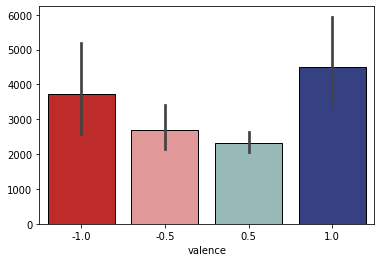

In [29]:
from session_timing import plot_latency
plot_latency(session_df_correct, session_obj)

In [31]:
session_df_correct['valence_1_back'] = session_df_correct['valence'].shift(1)

In [34]:
session_df_correct.groupby('valence_1_back')['Fixation Success'].median()

valence_1_back
-1.0    1917.5
-0.5    1876.0
 0.5    1846.0
 1.0    3036.5
Name: Fixation Success, dtype: Float64

In [37]:
session_df_correct.groupby('valence_1_back')['correct'].mean()

valence_1_back
-1.0    1.0
-0.5    1.0
 0.5    1.0
 1.0    1.0
Name: correct, dtype: float64

In [39]:
session_df_correct[['valence', 'valence_1_back', 'Fixation On', 'Fixation Success', 'CS On']].head(20)

,valence,valence_1_back,Fixation On,Fixation Success,CS On
0,-1.0,NaN,211,924,931
1,-0.5,-1.0,1103,1799,1811
2,1.0,-0.5,1040,1583,1592
3,1.0,1.0,1847,2522,2538
4,0.5,1.0,1847,2523,2538
5,0.5,0.5,1043,1737,1752
6,-0.5,0.5,1066,1758,1773
7,-1.0,-0.5,1045,1752,1769
8,-0.5,-1.0,1086,1779,1794
10,-1.0,-0.5,1034,1803,1818


In [41]:
session_df_correct['Fixation Success'] - session_df_correct['Fixation On']

0       713
1       696
2       543
3       675
4       676
       ... 
470     719
471    1719
473    2572
474     521
475    4030
Length: 399, dtype: Int32